In [53]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
%matplotlib inline

In [25]:
mails=pd.read_csv('spam.csv', encoding = 'latin-1')
mails = mails.loc[:, ~mails.columns.str.contains('^Unnamed')]
mails.columns = ['info','message']
for i in range(mails.shape[0]):
    if mails.iloc[i].info == 'spam' : 
        mails.iloc[i].info = 1
    else:
        mails.iloc[i].info = 0
mails.columns = ['label','message']
mails.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
totalMails = mails['message'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0,1) < 0.75:
        trainIndex += [i]
    else:
        testIndex +=[i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [27]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,U dun say so early hor... U c already then say...
2,0,"Nah I don't think he goes to usf, he lives aro..."
3,1,WINNER!! As a valued network customer you have...
4,1,Had your mobile 11 months or more? U R entitle...


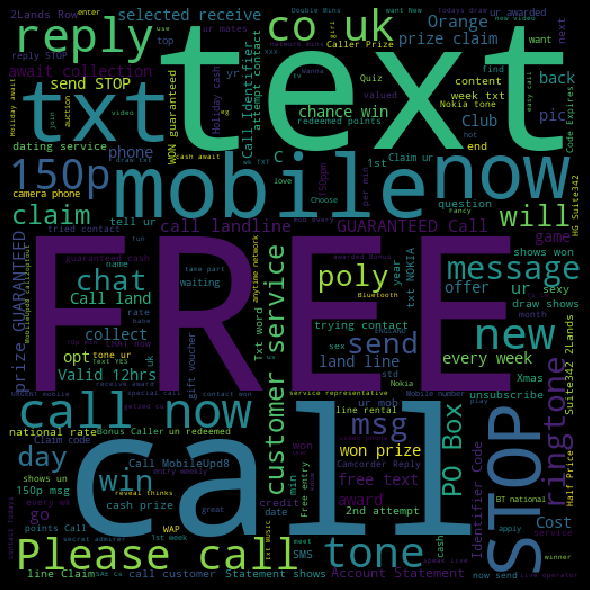

In [28]:
spam_words = ''.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

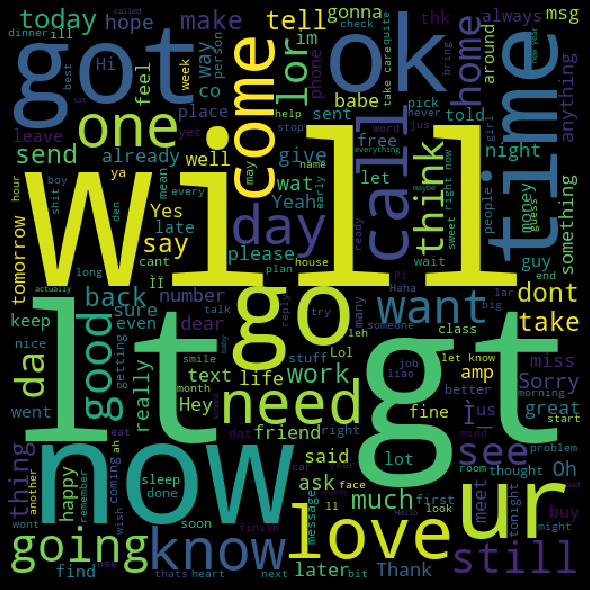

In [29]:
ham_words = ''.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [50]:
from nltk.stem import PorterStemmer
def process_message(message, gram = 1):
    lower_case = True
    stem = True
    stop_words = True
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram >= 1:
        w=[]
        for i in range(len(words)-gram+1):
            w += [''.join(words[i:i + gram])]
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words

In [54]:
sc_tf_idf = SpamClassifier(trainData,'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

NameError: name 'SpamClassifier' is not defined